29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training Data Shape: (60000, 28, 28), Test Data Shape: (10000, 28, 28)
Unique Labels: [0 1 2 3 4 5 6 7 8 9]


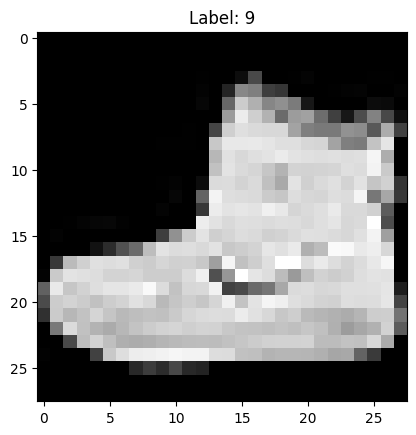

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Load the dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Print dataset shape
print(f"Training Data Shape: {X_train.shape}, Test Data Shape: {X_test.shape}")
print(f"Unique Labels: {np.unique(y_train)}")

# Display an example image
plt.imshow(X_train[0], cmap="gray")
plt.title(f"Label: {y_train[0]}")
plt.show()


In [2]:
# Flatten the images from 28x28 to 1D (784 features)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Normalize pixel values to range [0,1]
X_train = X_train / 255.0
X_test = X_test / 255.0

print(f"New Training Shape: {X_train.shape}, New Test Shape: {X_test.shape}")


New Training Shape: (60000, 784), New Test Shape: (10000, 784)


In [3]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define parameter grid for C values
param_grid = {'C': [0.1, 1, 10, 100]}

# Create an SVM classifier with linear kernel
svm_linear = SVC(kernel='linear')

# Perform Grid Search with 3-fold cross-validation
grid_search = GridSearchCV(svm_linear, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train[:10000], y_train[:10000])  # Use a subset for faster training

# Print the best parameter and accuracy
print(f"Best C: {grid_search.best_params_['C']}")
print(f"Best Training Accuracy: {grid_search.best_score_:.4f}")


Best C: 0.1
Best Training Accuracy: 0.8446


In [4]:
# Define parameter grid for degree and C values
param_grid = {'C': [0.1, 1, 10], 'degree': [2, 3, 4]}

# Create an SVM classifier with polynomial kernel
svm_poly = SVC(kernel='poly')

# Perform Grid Search
grid_search_poly = GridSearchCV(svm_poly, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_poly.fit(X_train[:10000], y_train[:10000])  # Use a subset for speed

# Print the best parameters
print(f"Best C: {grid_search_poly.best_params_['C']}, Best Degree: {grid_search_poly.best_params_['degree']}")
print(f"Best Training Accuracy: {grid_search_poly.best_score_:.4f}")


Best C: 10, Best Degree: 2
Best Training Accuracy: 0.8505


In [5]:
# Define parameter grid for C and gamma values
param_grid_rbf = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1]}

# Create an SVM classifier with RBF kernel
svm_rbf = SVC(kernel='rbf')

# Perform Grid Search
grid_search_rbf = GridSearchCV(svm_rbf, param_grid_rbf, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_rbf.fit(X_train[:10000], y_train[:10000])  # Use a subset for faster computation

# Print the best parameters
print(f"Best C: {grid_search_rbf.best_params_['C']}, Best Gamma: {grid_search_rbf.best_params_['gamma']}")
print(f"Best Training Accuracy: {grid_search_rbf.best_score_:.4f}")

# Evaluate the best models on the test set
best_linear = grid_search.best_estimator_
best_poly = grid_search_poly.best_estimator_
best_rbf = grid_search_rbf.best_estimator_

linear_acc = best_linear.score(X_test, y_test)
poly_acc = best_poly.score(X_test, y_test)
rbf_acc = best_rbf.score(X_test, y_test)

print(f"Test Accuracy - Linear: {linear_acc:.4f}, Polynomial: {poly_acc:.4f}, RBF: {rbf_acc:.4f}")


Best C: 10, Best Gamma: 0.01
Best Training Accuracy: 0.8701
Test Accuracy - Linear: 0.8387, Polynomial: 0.8515, RBF: 0.8669


In [6]:
# Extended hyperparameter tuning for RBF kernel
param_grid_rbf_fine = {
    'C': [5, 10, 50, 100],
    'gamma': [0.005, 0.01, 0.05]
}

grid_search_rbf_fine = GridSearchCV(SVC(kernel='rbf'), param_grid_rbf_fine, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_rbf_fine.fit(X_train[:10000], y_train[:10000])

# Print best parameters
print(f"Fine-Tuned Best C: {grid_search_rbf_fine.best_params_['C']}, Best Gamma: {grid_search_rbf_fine.best_params_['gamma']}")
print(f"Fine-Tuned Best Training Accuracy: {grid_search_rbf_fine.best_score_:.4f}")

# Evaluate on the test set
best_rbf_fine = grid_search_rbf_fine.best_estimator_
fine_tuned_rbf_acc = best_rbf_fine.score(X_test, y_test)
print(f"Fine-Tuned Test Accuracy (RBF): {fine_tuned_rbf_acc:.4f}")


Fine-Tuned Best C: 5, Best Gamma: 0.01
Fine-Tuned Best Training Accuracy: 0.8710
Fine-Tuned Test Accuracy (RBF): 0.8661


In [7]:
from sklearn.decomposition import PCA

# Reduce dimensions to 100 principal components
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train RBF SVM on reduced features
svm_rbf_pca = SVC(kernel='rbf', C=10, gamma=0.01)
svm_rbf_pca.fit(X_train_pca, y_train)

# Evaluate on test data
pca_rbf_acc = svm_rbf_pca.score(X_test_pca, y_test)
print(f"Test Accuracy with PCA (100 components) - RBF SVM: {pca_rbf_acc:.4f}")


Test Accuracy with PCA (100 components) - RBF SVM: 0.8950
